In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import signac
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from collections import OrderedDict, defaultdict
style.use('ggplot')
%matplotlib inline





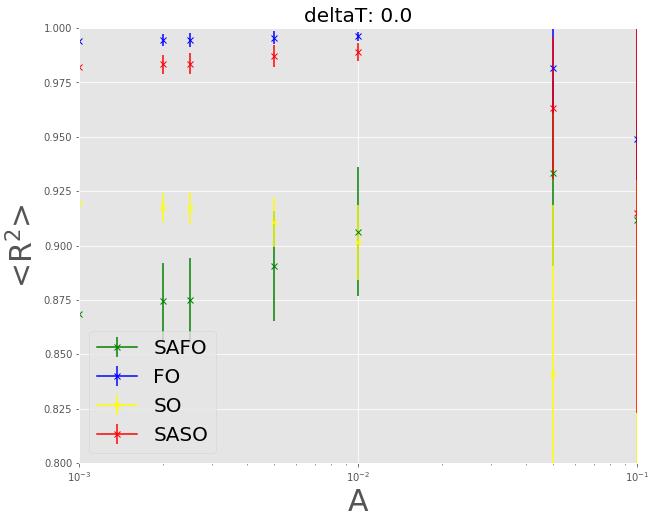

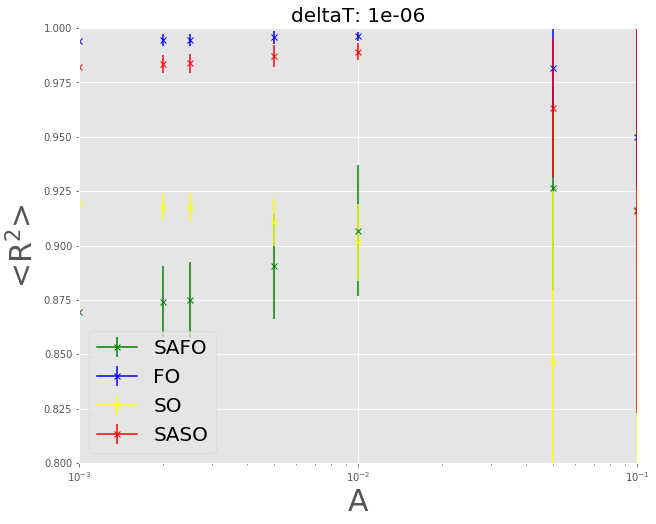

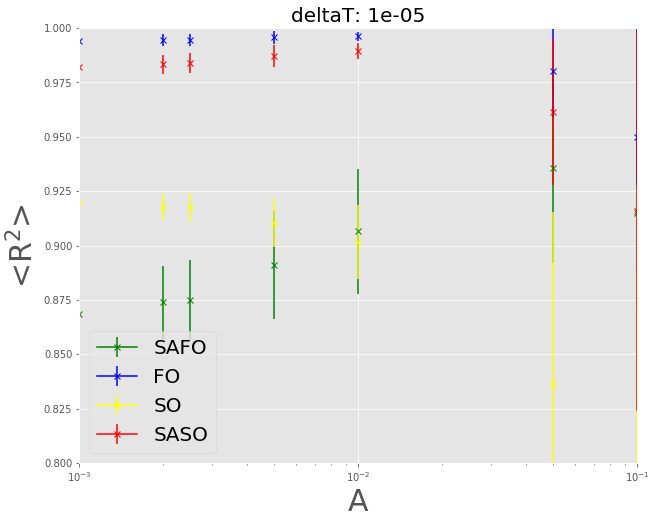

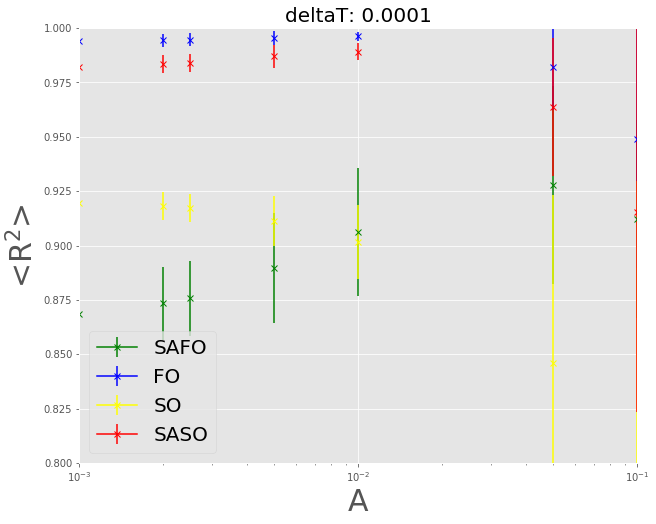

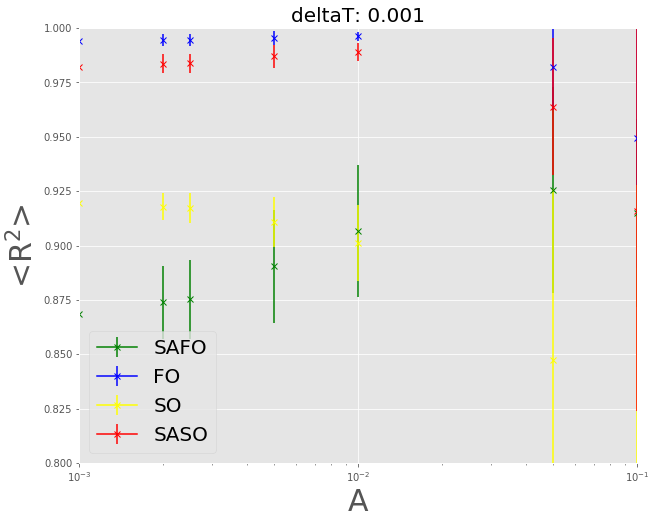

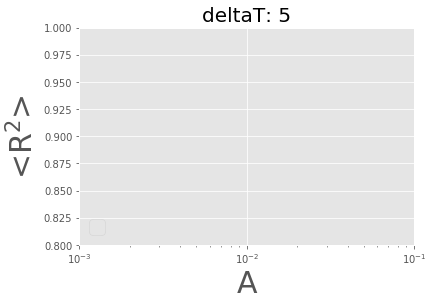

In [4]:
project = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")
deltaTs = [0.0, 1e-06, 1e-05, 0.0001, 0.001, 5]
#deltaTs = [0.0, 0.001]

for deltaT in deltaTs:
    jobs = project.find_jobs(filter={"deltaT":deltaT}, doc_filter={"cure_percent":{"$gte":89}})
    #jobs = project.find_jobs(filter={"deltaT":deltaT, "kT":0.5}, doc_filter={"cure_percent":{"$gte":89}})
    #jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":89}})



    models = [("FO", "blue"), ("SO","yellow"), ("SASO","red"), ("SAFO", "green")]
    models_color = {"FO_model_R2":"blue", "SO_model_R2":"yellow", "SASO_model_R2":"red","SAFO_model_R2":"green"}
    A_dic = {}
    for A, jobs in jobs.groupbydoc("mike_A"):
    #for A, jobs in project.groupbydoc("mike_A"):
        A_dic[A] = {}
        R2_dic = defaultdict(list)
        for job in jobs:
            for model, color in models:
                model_name = model+"_model_R2" 
                if job.doc[model_name]:
                    R2_val = job.doc[model_name]
                    R2_dic[model_name].append(R2_val)

        for model, _ in models:
            model_name = model+"_model_R2"
            R2_vals =  np.array(R2_dic[model_name])
            R2_ave = R2_vals.mean()
            R2_std = R2_vals.std()
            A_dic[A][model_name] = (R2_ave,R2_std)

    for A, _models in A_dic.items():
        for model_name, data in _models.items():
            R2_ave, R2_std = data
            color = models_color[model_name]
            name = model_name.split("_")[0]
            #print(A, name, R2_ave, R2_std, color)
            plt.figure(1,figsize=(10,8))
            plt.errorbar(A, R2_ave, yerr=R2_std, label=name, color=color, marker="x")    


    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", fontsize=20)

    plt.xscale("log")
    plt.xlabel("A", fontsize=30)
    plt.ylabel("<R$^2$>", fontsize=30)
    plt.title("deltaT: {}".format(deltaT), size=20)
    plt.xlim(0.001,1e-1)
    plt.ylim(0.8, 1)

    plt.show()


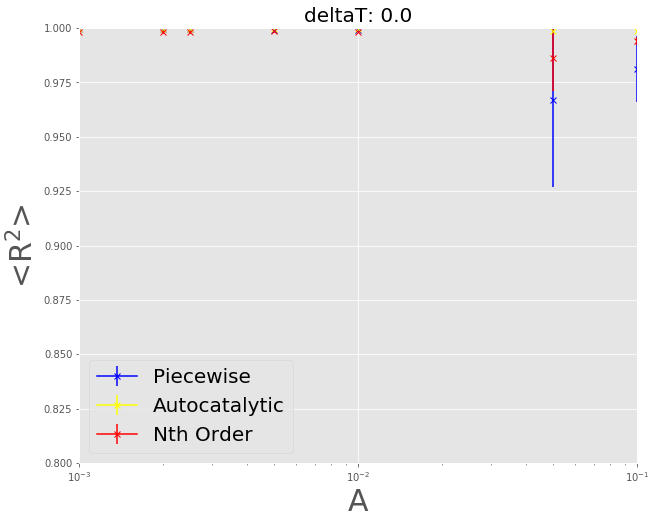

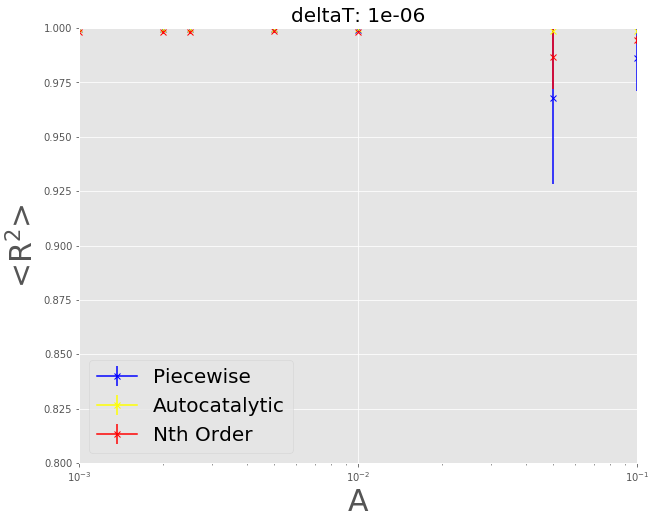

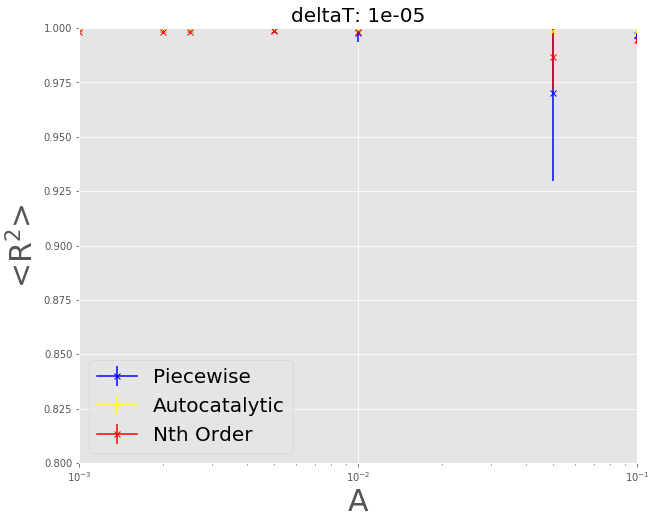

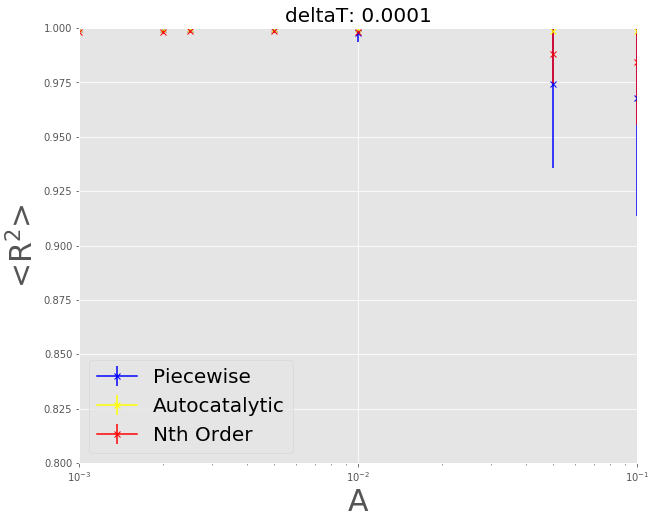

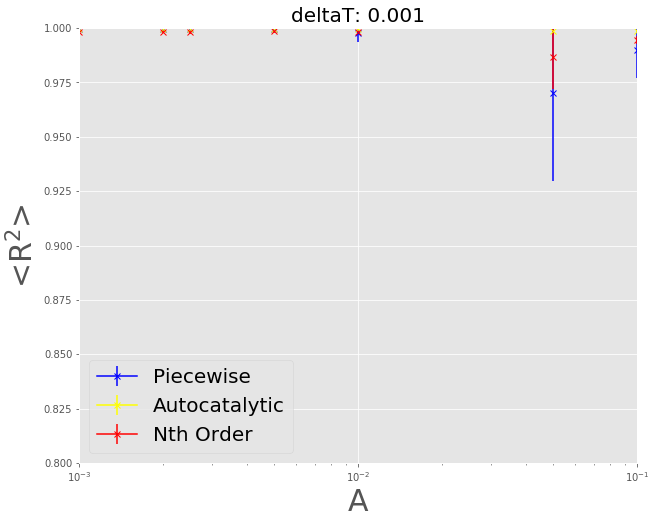

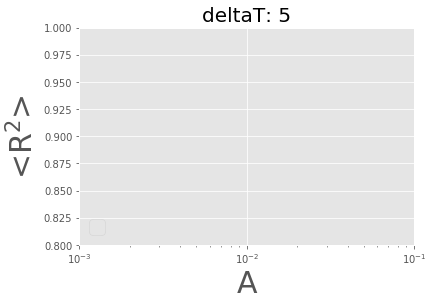

In [7]:
#project = signac.get_project("/home/mikehenry/epoxy-stuff/test-n_bonds")

#jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":90}})
deltaTs = [0.0, 1e-06, 1e-05, 0.0001, 0.001, 5]
#deltaTs = [0.0, 0.001]

for deltaT in deltaTs:
    jobs = project.find_jobs(filter={"deltaT":deltaT}, doc_filter={"cure_percent":{"$gte":89}})


    models = [("r_squared_both", "blue"), ("r_squared_auto","yellow"), ("r_squared_diff","red")]
    models_color = {"r_squared_both":"blue", "r_squared_auto":"yellow", "r_squared_diff":"red"}
    f_name_map = {"r_squared_both":"Piecewise", "r_squared_auto":"Autocatalytic", "r_squared_diff":"Nth Order"}
    A_dic = {}
    for A, jobs in jobs.groupbydoc("mike_A"):
    #for A, jobs in project.groupbydoc("mike_A"):
        A_dic[A] = {}
        R2_dic = defaultdict(list)
        for job in jobs:
            for model, color in models:
                model_name = model
                try:
                    if job.doc[model_name]:
                        R2_val = job.doc[model_name]
                        R2_dic[model_name].append(R2_val)
                except(KeyError):
                    continue

        for model, _ in models:
            model_name = model
            R2_vals =  np.array(R2_dic[model_name])
            R2_ave = R2_vals.mean()
            R2_std = R2_vals.std()
            A_dic[A][model_name] = (R2_ave,R2_std)

    for A, _models in A_dic.items():
        for model_name, data in _models.items():
            R2_ave, R2_std = data
            color = models_color[model_name]
            name = f_name_map[model_name]
            #print(A, name, R2_ave, R2_std, color)
            plt.figure(1,figsize=(10,8))
            plt.errorbar(A, R2_ave, yerr=R2_std, label=name, color=color, marker="x")    


    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", fontsize=20)

    plt.xscale("log")
    plt.xlabel("A", fontsize=30)
    plt.ylabel("<R$^2$>", fontsize=30)
    plt.title("deltaT: {}".format(deltaT), size=20)
    plt.xlim(0.001,1e-1)
    plt.ylim(0.8, 1)
    plt.show()
